## source
https://gist.github.com/mohzeki222/c67da1ef52ac265f102db6e380ff8cb4#file-qa4u3_day6-ipynb

In [1]:
import jijmodeling as jm
import jijmodeling_transpiler as jmt
from openjij import SASampler
import matplotlib.pyplot as plt
import numpy as np

sampler = SASampler()

In [2]:
d = 2
N1 = 100
N2 = 100
N3 = 100
z1 = 0.2 * np.random.randn(N1 * d).reshape(d, N1) - 2.5
z2 = 0.2 * np.random.randn(N2 * d).reshape(d, N2) + 2.5
z3 = 0.2 * np.random.randn(N3 * d).reshape(d, N3)
z = np.concatenate([z1, z2, z3], axis=1)

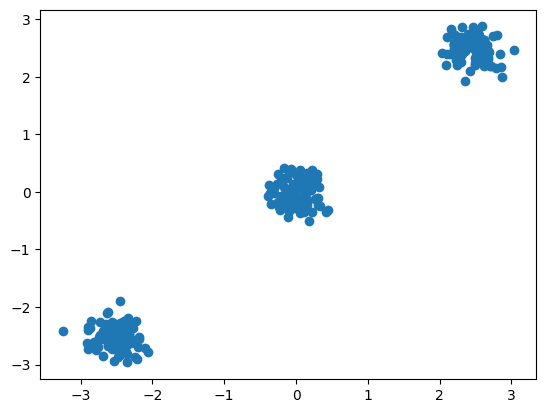

In [3]:
plt.scatter(z[0, :], z[1, :])
plt.show()

In [4]:
K = 3
N = N1 + N2 + N3

In [ ]:
x = jm.BinaryVar("x", shape=(K, N))
k = jm.Element("k", belong_to=(0, K))
l = jm.Element("l", belong_to=(0, K))  # noqa: E741
i = jm.Element("i", belong_to=(0, N))
W = jm.Placeholder("W", ndim=2)
a = jm.Placeholder("a", ndim=2)

目的関数

In [6]:
problem = jm.Problem("clustering", sense=jm.ProblemSense.MINIMIZE)
sum1 = -2 * jm.sum([k, i], a[k, i] * x[k, i])
sum2 = jm.sum([k, l, i], W[k, l] * x[k, i] * x[l, i])
problem += sum1 + sum2

制約条件

In [7]:
problem += jm.Constraint("one group", jm.sum(k, x[k, i]) == 1, forall=i)

In [8]:
problem

In [9]:
Wvec = np.random.randn(K * d).reshape(d, K)
instance_data = {"a": np.dot(Wvec.T, z), "W": np.dot(Wvec.T, Wvec)}

In [10]:
compiled_model = jmt.core.compile_model(problem, instance_data, {})
pubo_builder = jmt.core.pubo.transpile_to_pubo(compiled_model=compiled_model)
qubo, const = pubo_builder.get_qubo_dict(multipliers={"one group": 10.0})

In [11]:
num_reads = 10
sampleset = sampler.sample_qubo(qubo, num_reads=num_reads)

In [12]:
ans = sampleset.record[0][0].reshape(K, N)

すべての点が必ず1つの軸に属しているかどうか確認

In [13]:
ans.sum(axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

各グループごとの値の確認

In [14]:
ans.sum(axis=1)

array([100, 100, 100])

In [15]:
for i in range(N):
    for k in range(K):
        if ans[k, i] == 1:
            print("データ{}は{} th groupに分類される。".format(i, k))

データ0は2 th groupに分類される。
データ1は1 th groupに分類される。
データ2は1 th groupに分類される。
データ3は0 th groupに分類される。
データ4は2 th groupに分類される。
データ5は1 th groupに分類される。
データ6は0 th groupに分類される。
データ7は1 th groupに分類される。
データ8は2 th groupに分類される。
データ9は1 th groupに分類される。
データ10は2 th groupに分類される。
データ11は0 th groupに分類される。
データ12は0 th groupに分類される。
データ13は1 th groupに分類される。
データ14は1 th groupに分類される。
データ15は0 th groupに分類される。
データ16は1 th groupに分類される。
データ17は1 th groupに分類される。
データ18は2 th groupに分類される。
データ19は1 th groupに分類される。
データ20は0 th groupに分類される。
データ21は1 th groupに分類される。
データ22は0 th groupに分類される。
データ23は1 th groupに分類される。
データ24は0 th groupに分類される。
データ25は1 th groupに分類される。
データ26は1 th groupに分類される。
データ27は1 th groupに分類される。
データ28は0 th groupに分類される。
データ29は1 th groupに分類される。
データ30は1 th groupに分類される。
データ31は2 th groupに分類される。
データ32は1 th groupに分類される。
データ33は0 th groupに分類される。
データ34は0 th groupに分類される。
データ35は0 th groupに分類される。
データ36は1 th groupに分類される。
データ37は1 th groupに分類される。
データ38は2 th groupに分類される。
データ39は0 th groupに分類される。
データ40は2 th groupに分類される。
データ41は0 th groupに分類される。
デー

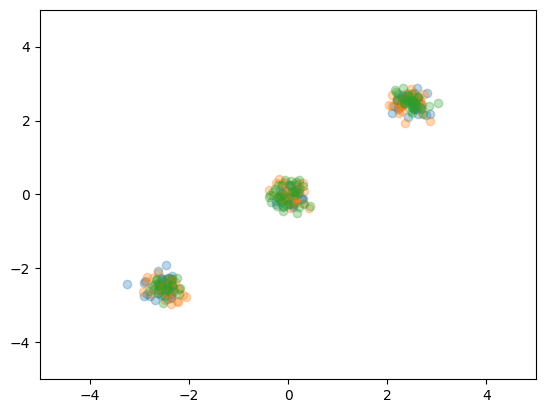

In [16]:
for k in range(K):
    itemp = np.where(ans[k, :] == 1)[0]
    plt.scatter(z[0, itemp], z[1, itemp], alpha=0.3)
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
plt.show()

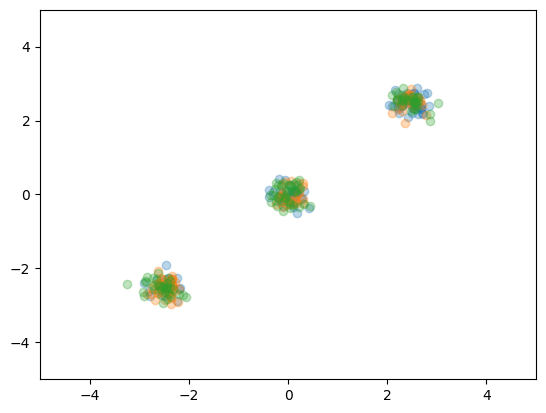

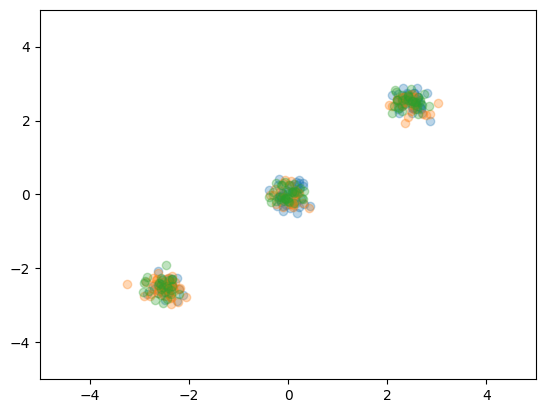

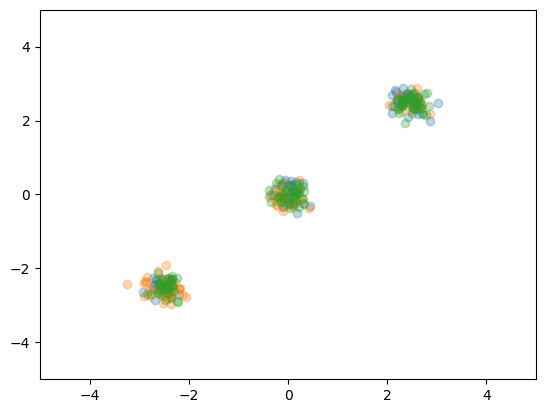

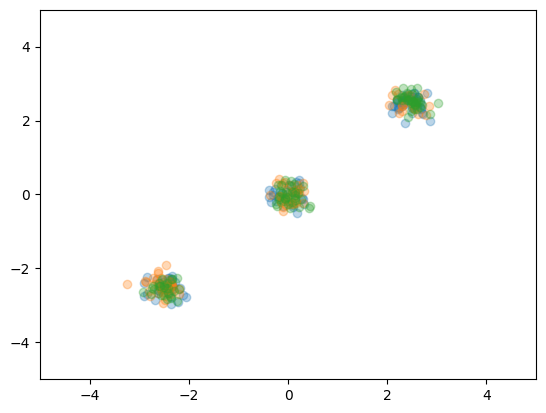

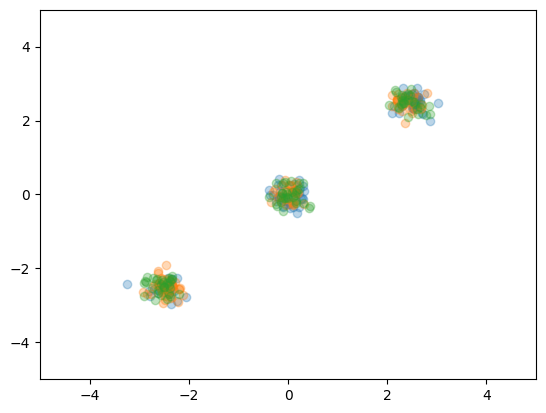

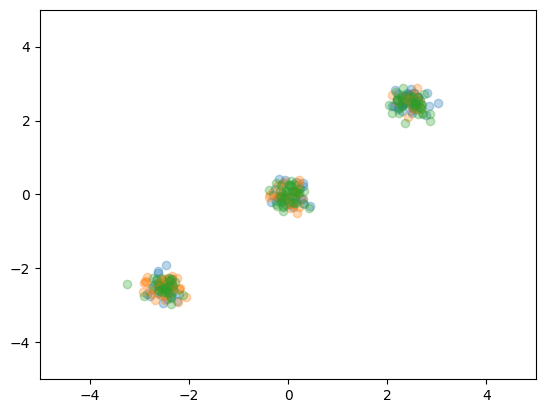

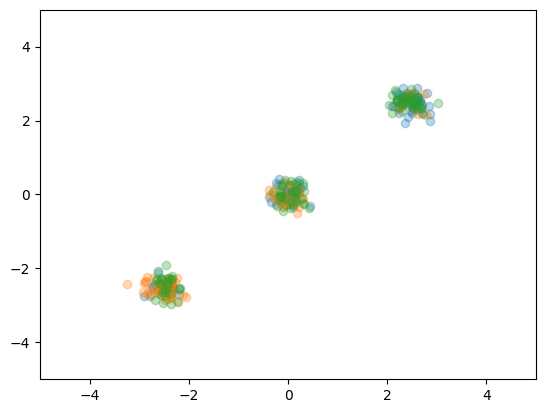

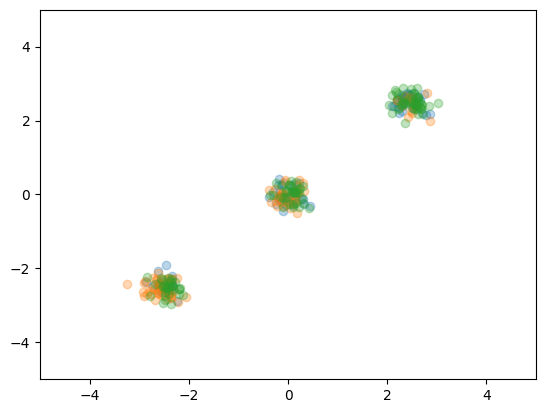

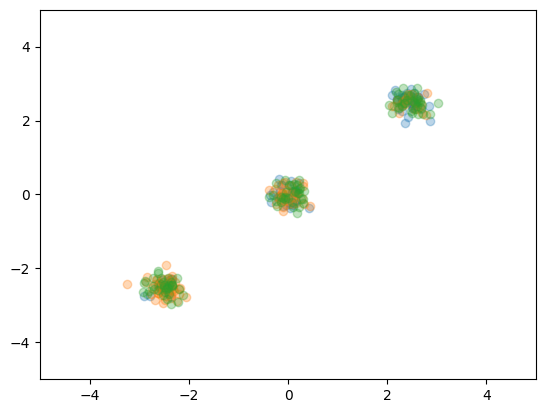

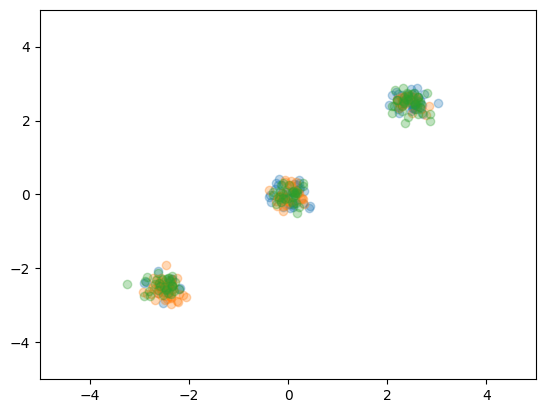

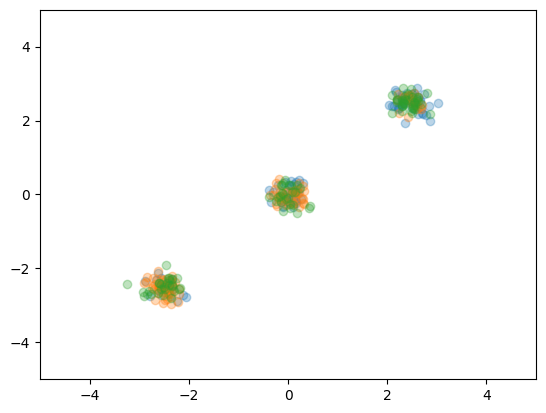

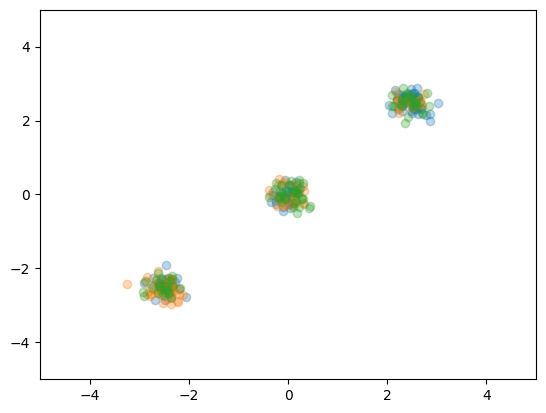

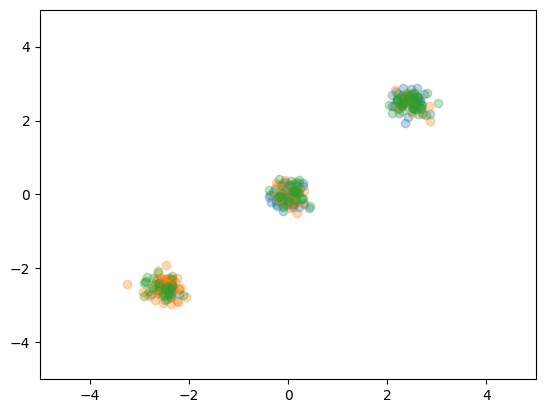

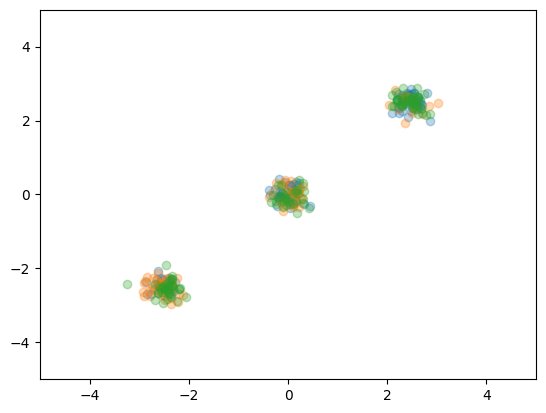

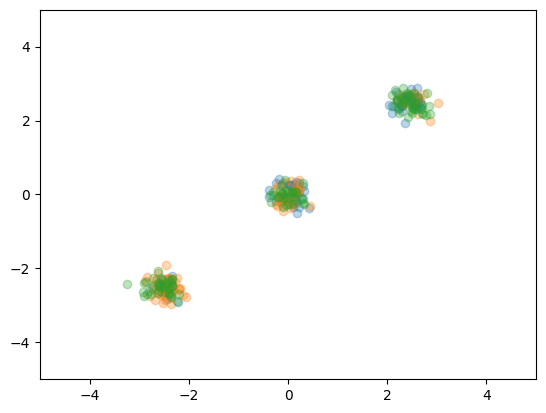

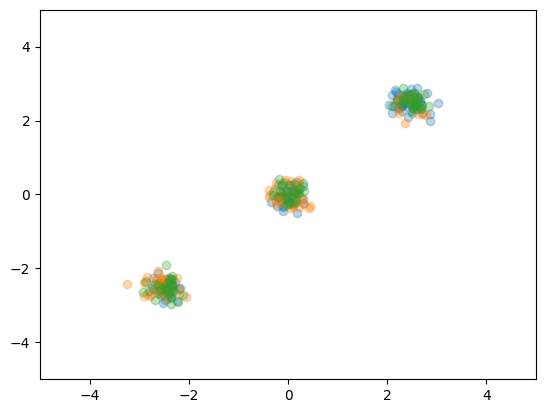

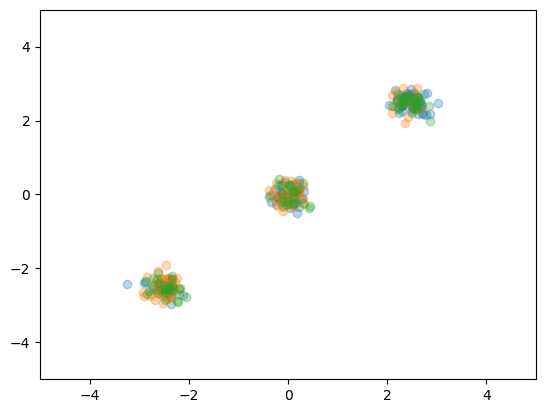

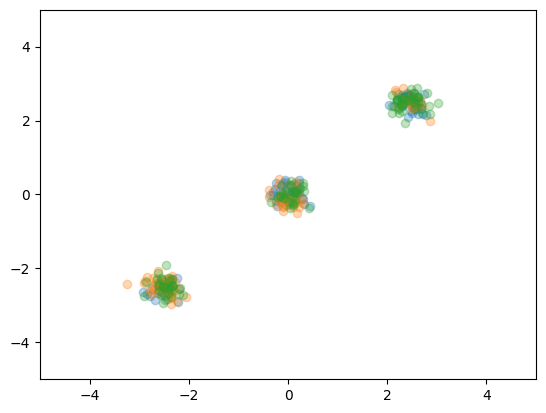

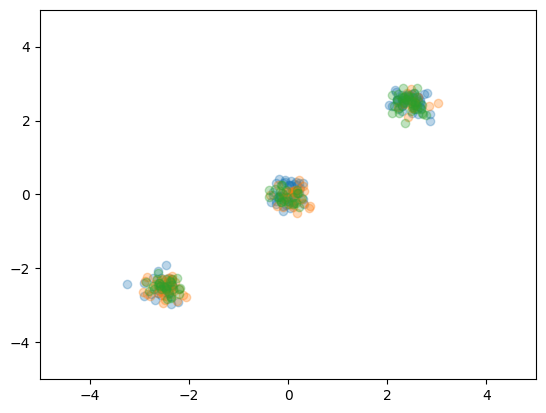

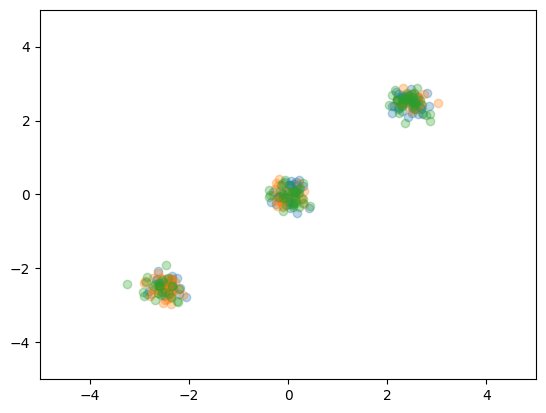

In [17]:
Tall = 20
Wvec = np.random.randn(K * d).reshape(d, K)
for t in range(Tall):
    instance_data = {"a": np.dot(Wvec.T, z), "W": np.dot(Wvec.T, Wvec)}
    compiled_model = jmt.core.compile_model(problem, instance_data, {})
    pubo_builder = jmt.core.pubo.transpile_to_pubo(compiled_model=compiled_model)
    qubo, const = pubo_builder.get_qubo_dict(multipliers={"one group": 10.0})
    sampleset = sampler.sample_qubo(qubo, num_reads=num_reads)
    ans = sampleset.record[0][0].reshape(K, N)
    for k in range(K):
        itemp = np.where(ans[k, :] == 1)[0]
        Wvec[:, k] = 0.9 * Wvec[:, k] + 0.1 * z[:, itemp].sum() / (len(itemp))
        plt.scatter(z[0, itemp], z[1, itemp], alpha=0.3)
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
    plt.show()

QUBO自作

In [18]:
def create_qubo(a, Wmat, lam=10.0):
    QUBO = {}

    for i in range(N):
        for k1 in range(K):
            for k2 in range(K):
                QUBO[(i + k1 * N, i + k2 * N)] = Wmat[k1, k2]
                if k1 == k2:
                    QUBO[(i + k1 * N, i + k2 * N)] = (
                        QUBO[(i + k1 * N, i + k2 * N)] - 2 * a[k1, i]
                    )

    for i in range(N):
        for k1 in range(K):
            for k2 in range(K):
                QUBO[(i + k1 * N, i + k2 * N)] = QUBO[(i + k1 * N, i + k2 * N)] + lam
                if k1 == k2:
                    QUBO[(i + k1 * N, i + k2 * N)] = (
                        QUBO[(i + k1 * N, i + k2 * N)] - 2 * lam
                    )

    return QUBO

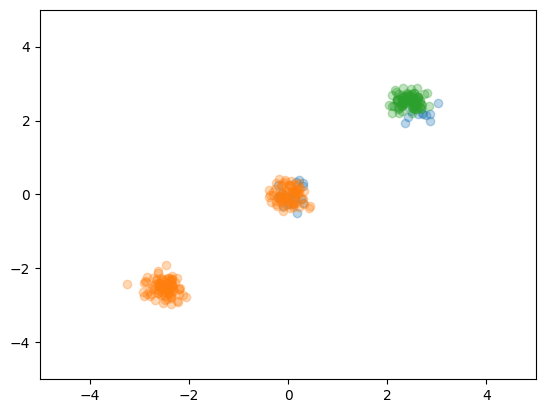

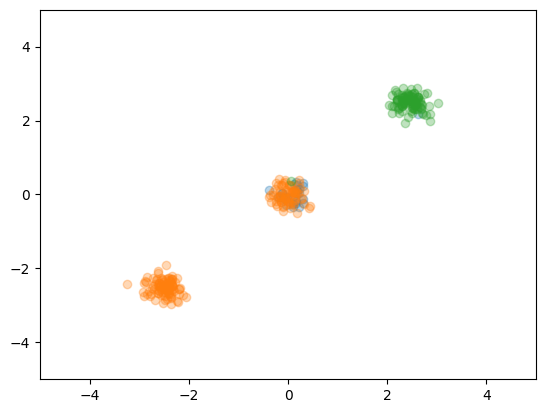

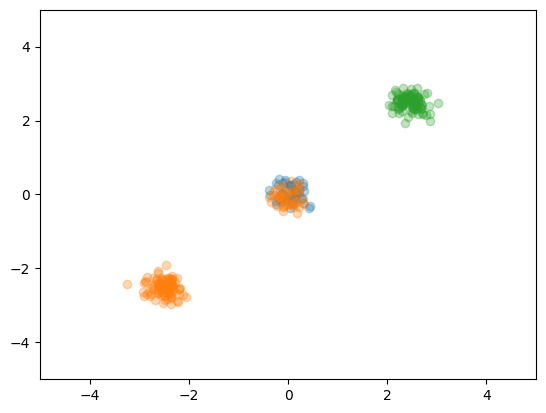

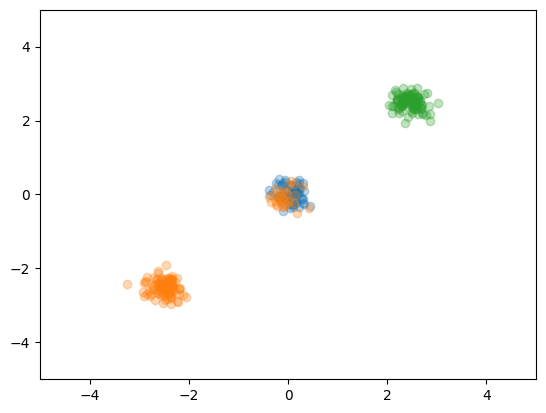

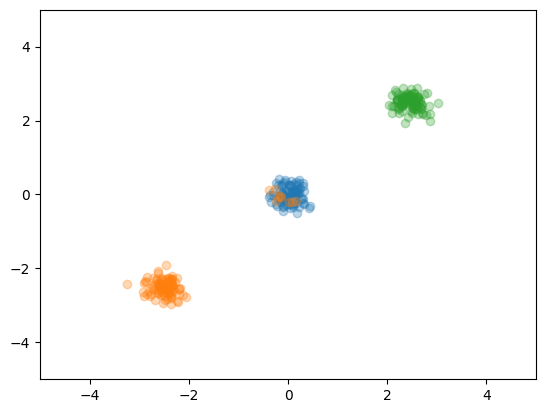

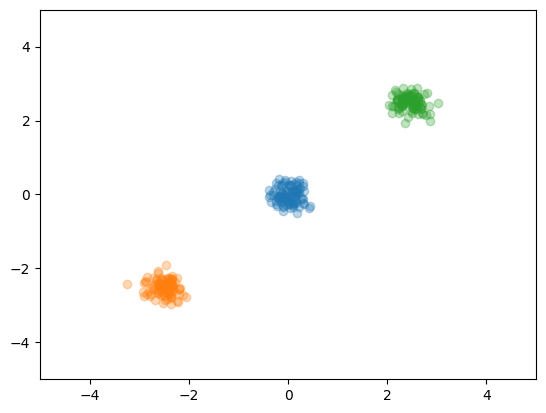

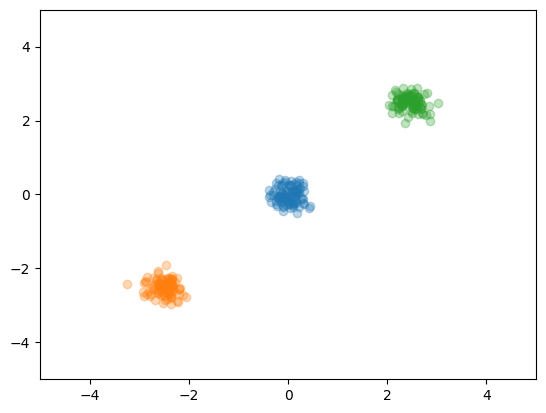

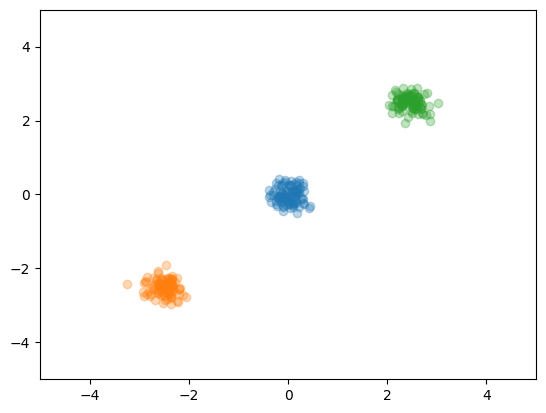

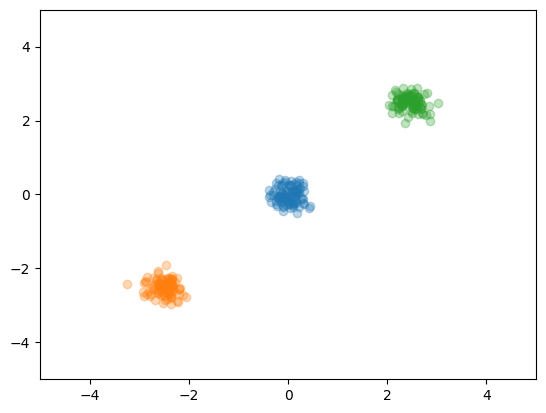

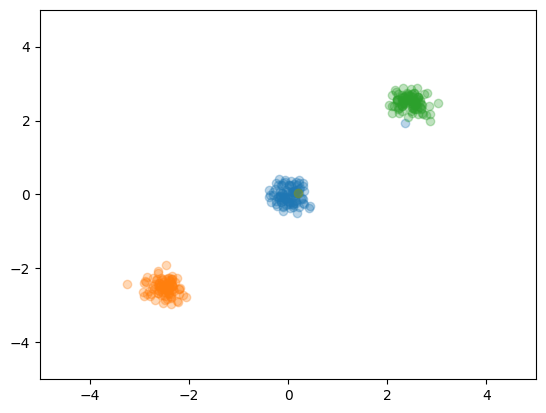

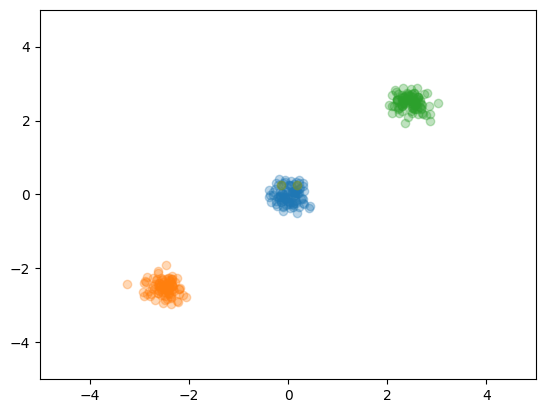

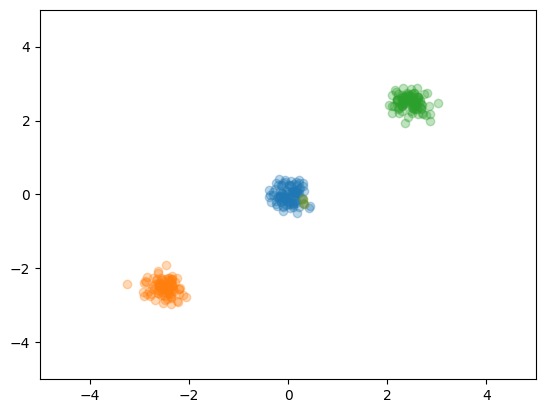

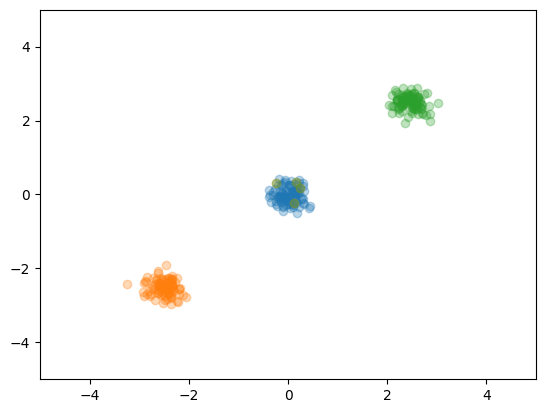

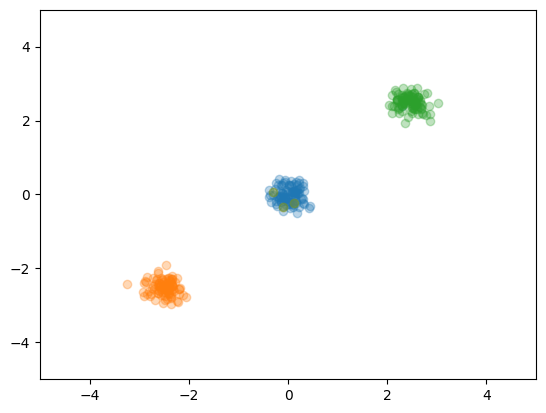

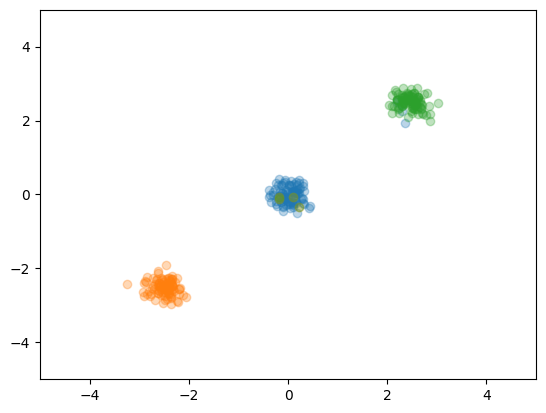

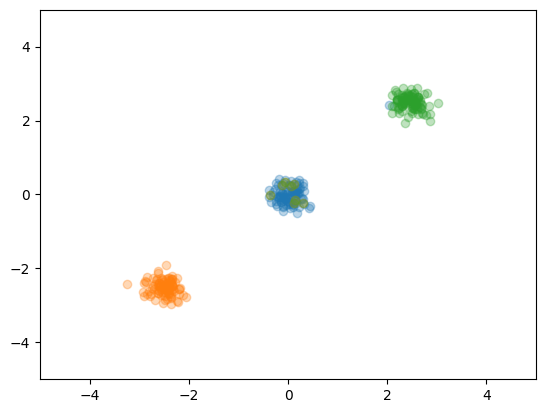

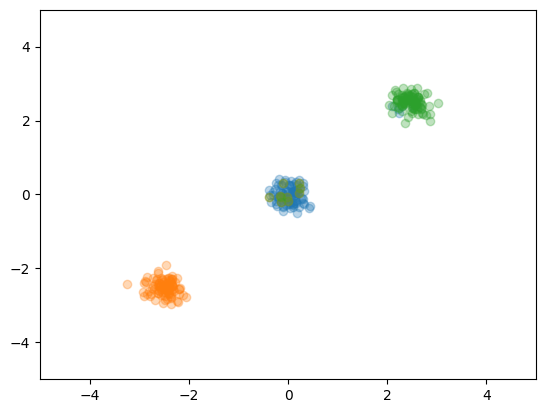

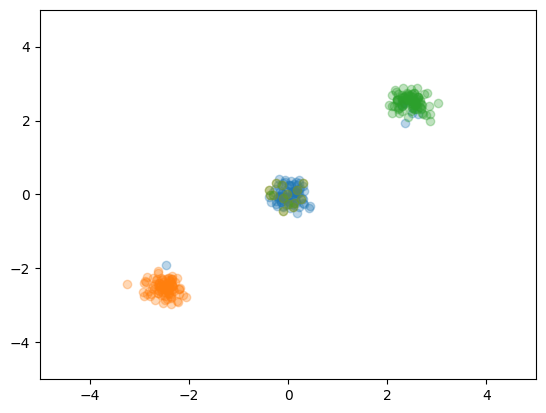

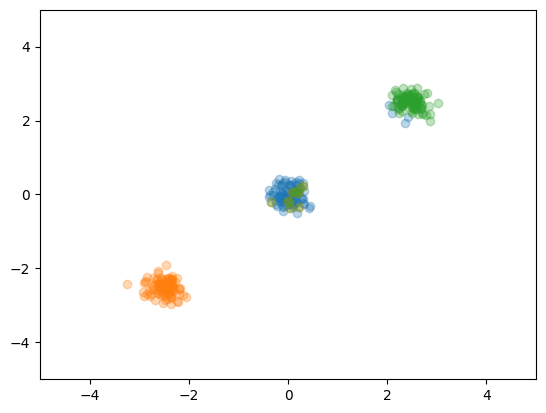

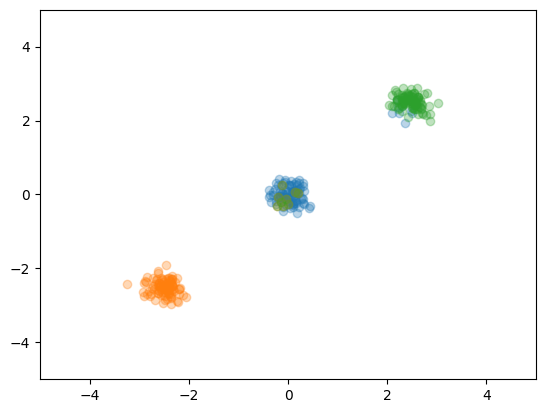

In [19]:
Tall = 20
Wvec = np.random.randn(K * d).reshape(d, K)
for t in range(Tall):
    QUBO = create_qubo(np.dot(Wvec.T, z), np.dot(Wvec.T, Wvec))
    sampleset = sampler.sample_qubo(QUBO, num_reads=num_reads)
    ans = sampleset.record[0][0].reshape(K, N)
    for k in range(K):
        itemp = np.where(ans[k, :] == 1)[0]
        Wvec[:, k] = 0.9 * Wvec[:, k] + 0.1 * z[:, itemp].sum() / (len(itemp))
        plt.scatter(z[0, itemp], z[1, itemp], alpha=0.3)
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
    plt.show()

お隣さん同士は同じクラスター

In [20]:
Dmat = np.zeros([N, N])
for i in range(N):
    for j in range(N):
        # Dmat[i,j] = 0.001*np.sqrt((z[0,i] - z[0,j])**2 + (z[1,i] - z[1,j])**2)
        Dmat[i, j] = np.sqrt((z[0, i] - z[0, j]) ** 2 + (z[1, i] - z[1, j]) ** 2)

Nn = 5
for i in range(N):
    dtemp = Dmat[i, :]
    itemp = np.argsort(dtemp)
    Dmat[i, itemp[0:Nn]] = -1
    Dmat[i, itemp[Nn:]] = 0

Dmat = Dmat.T + Dmat

In [21]:
def create_qubo_dist(a, Wmat, Dmat, lam=10.0):
    QUBO = {}

    for i in range(N):
        for k1 in range(K):
            for k2 in range(K):
                QUBO[(i + k1 * N, i + k2 * N)] = Wmat[k1, k2]
                if k1 == k2:
                    QUBO[(i + k1 * N, i + k2 * N)] = (
                        QUBO[(i + k1 * N, i + k2 * N)] - 2 * a[k1, i]
                    )

    for i in range(N):
        for k1 in range(K):
            for k2 in range(K):
                QUBO[(i + k1 * N, i + k2 * N)] = QUBO[(i + k1 * N, i + k2 * N)] + lam
                if k1 == k2:
                    QUBO[(i + k1 * N, i + k2 * N)] = (
                        QUBO[(i + k1 * N, i + k2 * N)] - 2 * lam
                    )

    for i in range(N):
        for j in range(N):
            for k1 in range(K):
                for k2 in range(K):
                    if k1 != k2:
                        if (i + k1 * N, j + k2 * N) not in QUBO.keys():
                            QUBO[(i + k1 * N, j + k2 * N)] = -Dmat[i, j]
                        else:
                            QUBO[(i + k1 * N, j + k2 * N)] = (
                                QUBO[(i + k1 * N, j + k2 * N)] - Dmat[i, j]
                            )

    return QUBO

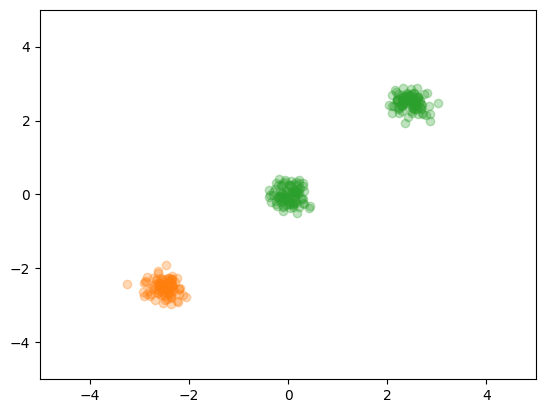

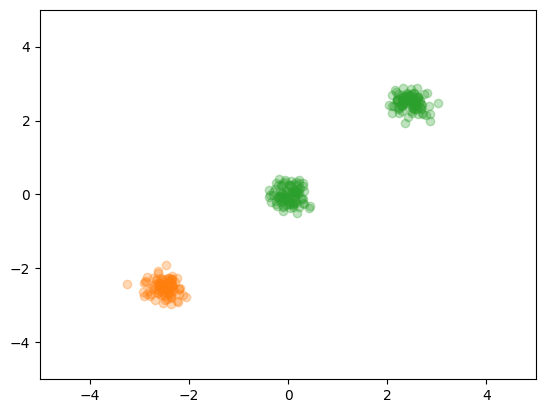

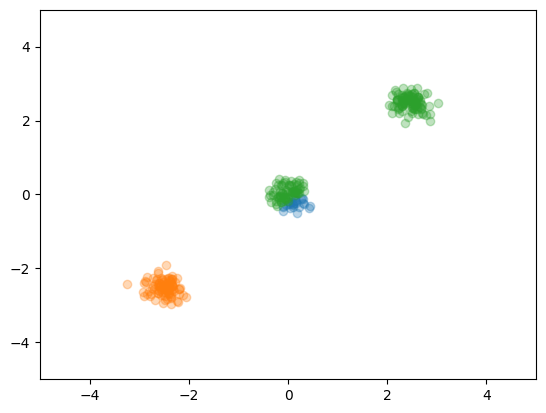

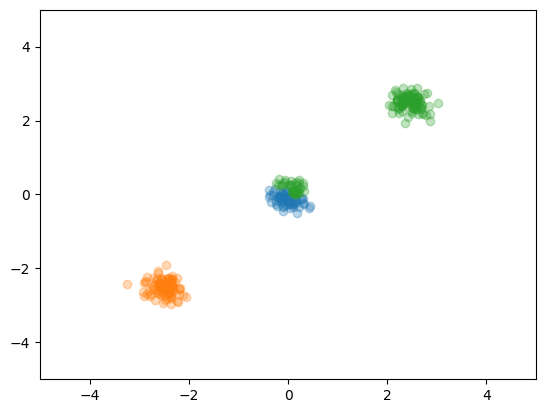

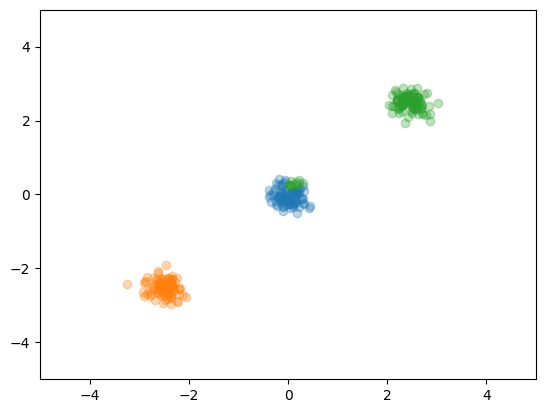

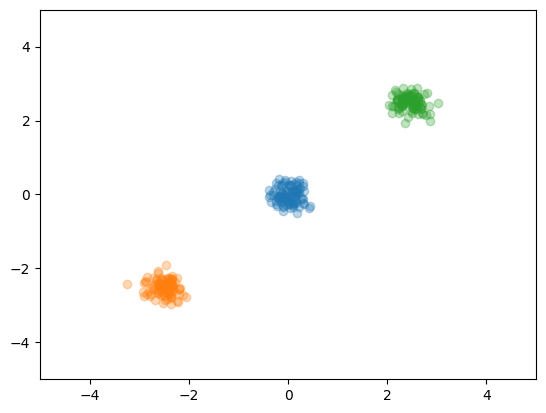

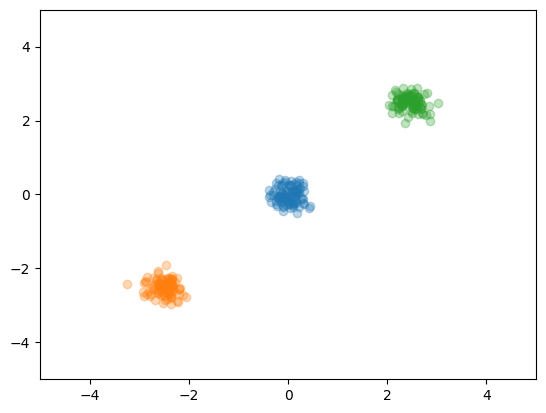

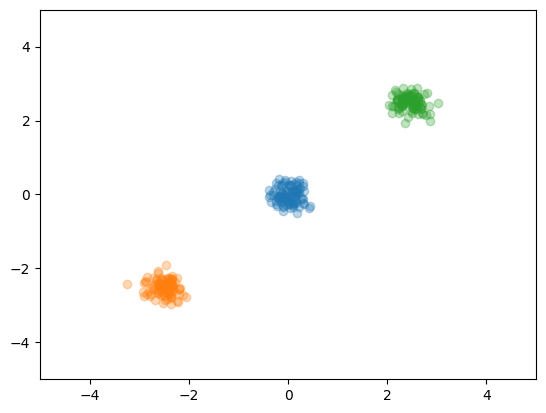

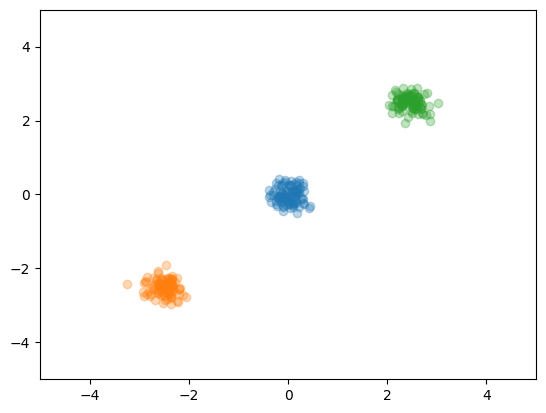

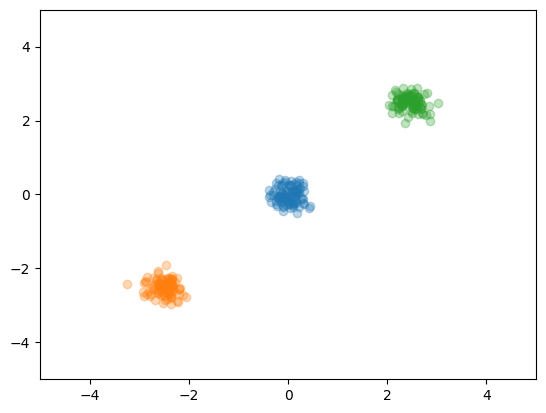

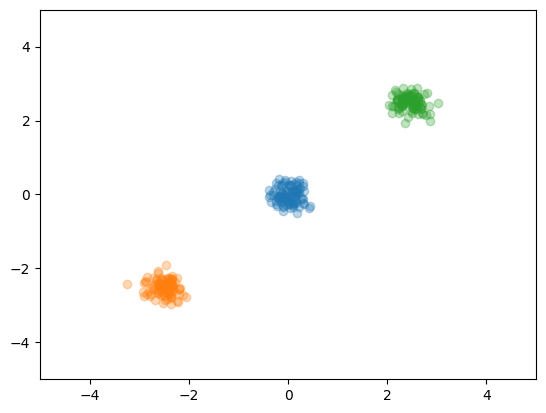

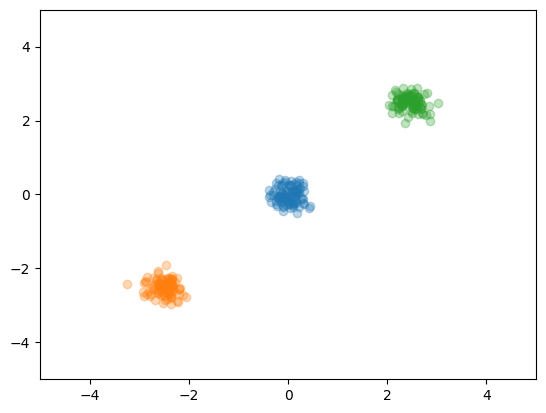

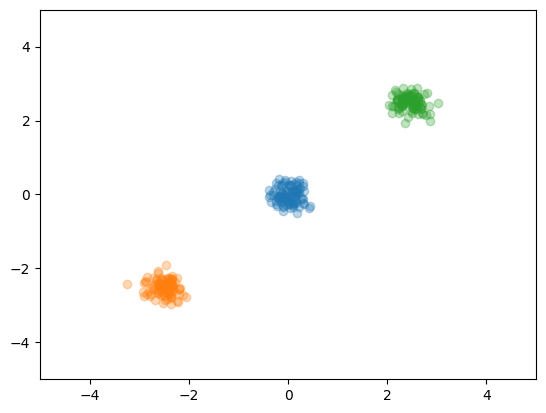

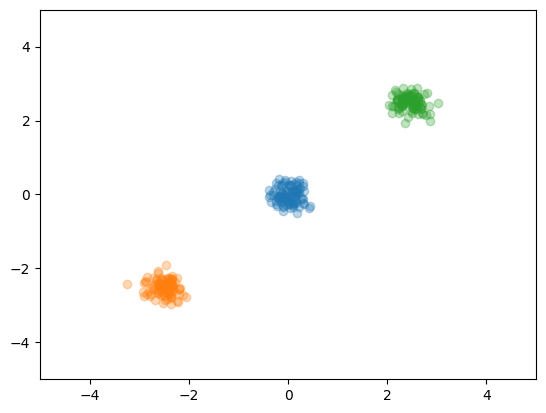

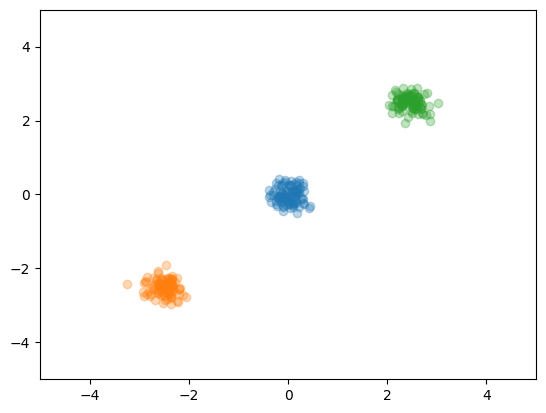

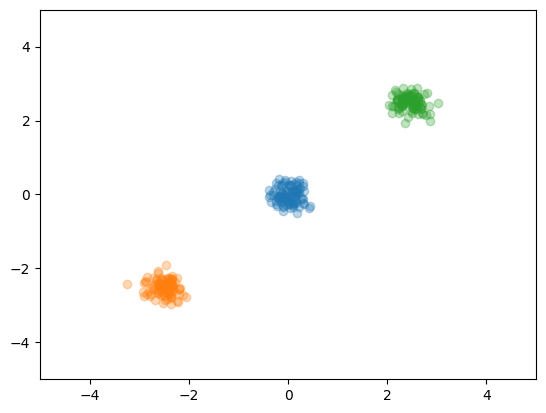

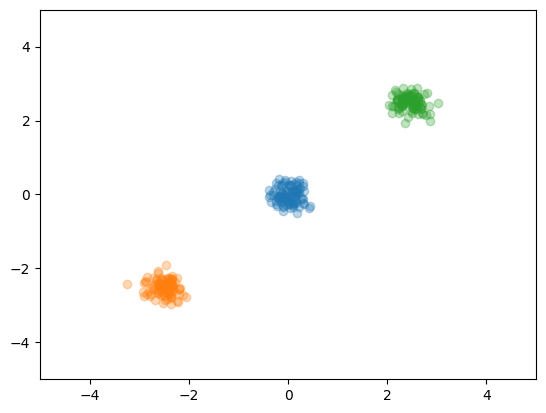

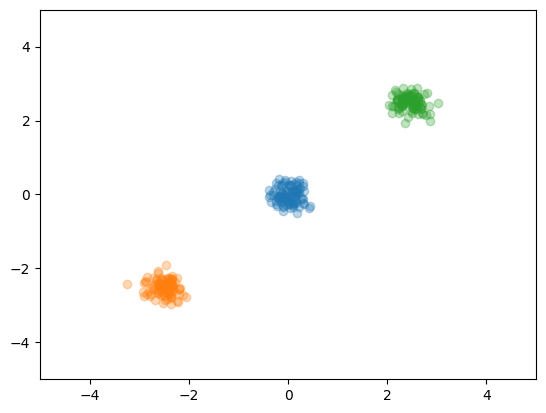

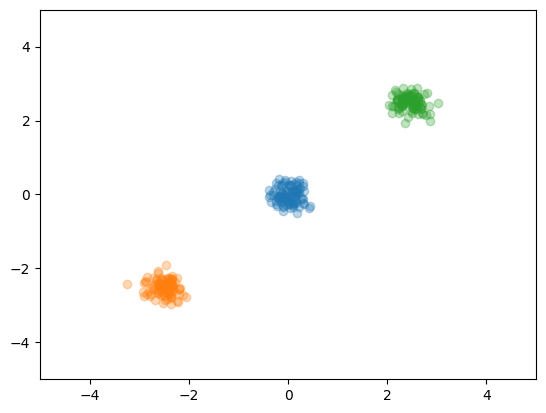

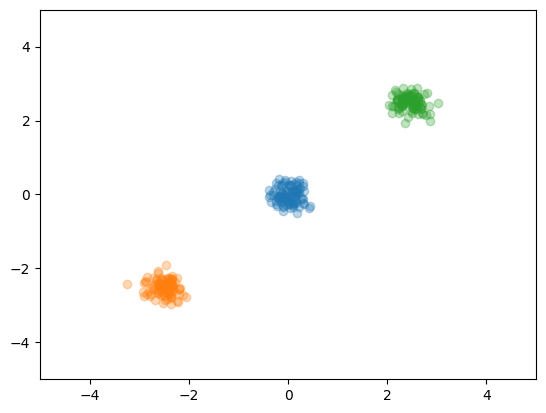

In [22]:
Tall = 20
Wvec = np.random.randn(K * d).reshape(d, K)
for t in range(Tall):
    QUBO = create_qubo_dist(np.dot(Wvec.T, z), np.dot(Wvec.T, Wvec), Dmat)
    sampleset = sampler.sample_qubo(QUBO, num_reads=num_reads)
    ans = sampleset.record[0][0].reshape(K, N)
    for k in range(K):
        itemp = np.where(ans[k, :] == 1)[0]
        Wvec[:, k] = 0.9 * Wvec[:, k] + 0.1 * z[:, itemp].sum() / (1 + len(itemp))
        plt.scatter(z[0, itemp], z[1, itemp], alpha=0.3)
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
    plt.show()